<a href="https://colab.research.google.com/github/JerobenFaith03/Kamilimu-assignments/blob/Faith_python_libraries_2/python_libraries_2/python_libraries2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

countries = pd.read_csv("https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv")

In [ ]:
countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [ ]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
athletes['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

# Section 1: Matplotlib

1. **Plot a bar graph of the top 5 countries with the highest number of athletes. Display the athlete count value on top of each bar.**

In [1]:
import matplotlib.pyplot as plt

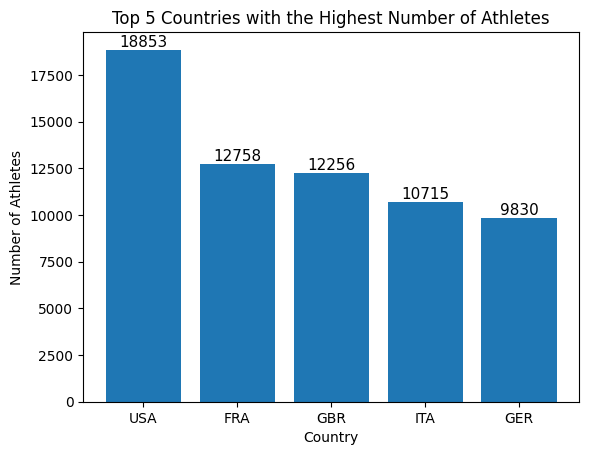

In [ ]:
top_countries = athletes['NOC'].value_counts().head(5)

bars = plt.bar(top_countries.index, top_countries.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        str(height),
        ha='center', va='bottom', fontsize=11
    )

plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.title('Top 5 Countries with the Highest Number of Athletes')

plt.show()


2.   **Create a bar chart showing athlete
counts by season (Summer and Winter). Set y-axis ticks from 0 to max count in steps of 5000. Assign summer the color turquoise and winter the color cyan. Set alpha=0.5 for transparency.**

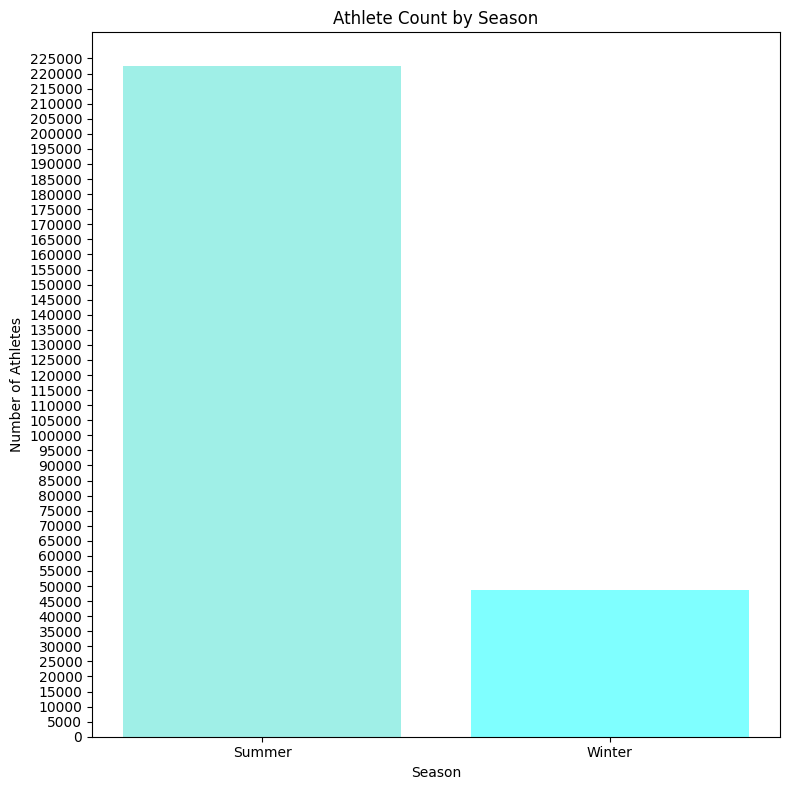

In [3]:

import numpy as np


season_counts = athletes['Season'].value_counts()


colors = ['turquoise' if season == 'Summer' else 'cyan' for season in season_counts.index]


plt.figure(figsize=(8, 8))
bars = plt.bar(season_counts.index, season_counts.values, color=colors, alpha=0.5)


max_count = season_counts.max()
plt.yticks(np.arange(0, max_count + 5000, 5000))


plt.xlabel("Season")
plt.ylabel("Number of Athletes")
plt.title("Athlete Count by Season")




plt.tight_layout()
plt.show()


3.  **Create a stacked bar chart where each
bar represents a type of medal (Gold, Silver, Bronze), and the height of each bar shows the total number of times that medal was won. Each bar should be divided (stacked) by gender to show how many of those medals were won by male and female athletes. Move the legend to the right, outside the plot**

In [5]:
medal_gender_counts = athletes.groupby(['Medal', 'Sex']).size().unstack()


medal_order = ['Gold', 'Silver', 'Bronze']
medal_gender_counts = medal_gender_counts.reindex(medal_order)

print(medal_gender_counts)



Sex        F     M
Medal             
Gold    3747  9625
Silver  3735  9381
Bronze  3771  9524


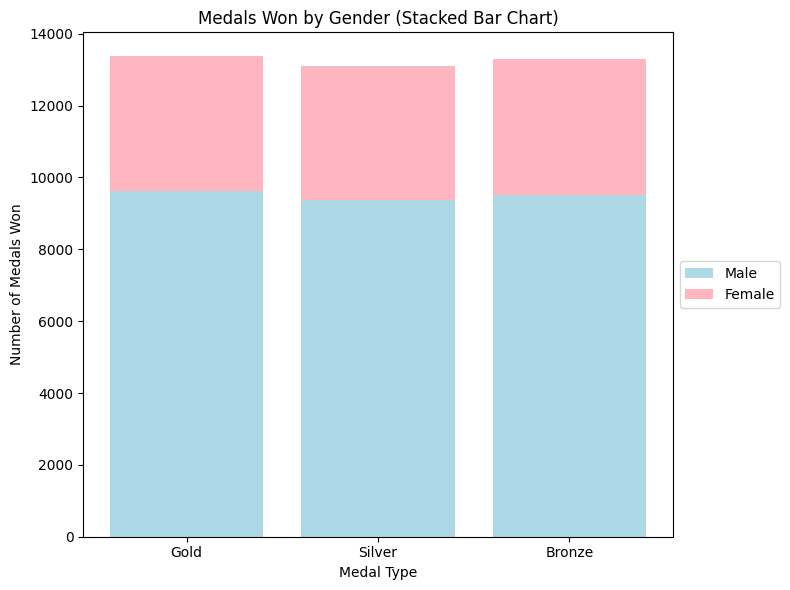

In [8]:



medal_gender_counts = athletes.groupby(['Medal', 'Sex']).size().unstack()


medal_order = ['Gold', 'Silver', 'Bronze']
medal_gender_counts = medal_gender_counts.reindex(medal_order)


plt.figure(figsize=(8, 6))
male = plt.bar(medal_gender_counts.index, medal_gender_counts['M'], label='Male', color='lightblue')
female = plt.bar(medal_gender_counts.index, medal_gender_counts['F'],
                 bottom=medal_gender_counts['M'], label='Female', color='lightpink')


plt.xlabel("Medal Type")
plt.ylabel("Number of Medals Won")
plt.title("Medals Won by Gender (Stacked Bar Chart)")


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


4. **Plot a scatterplot of weight (y-axis) against age(x-axis) of athletes. Add a vertical line at age 25 to split "younger" vs "older" athletes. Add a horizontal line at weight=70 to mark a reference threshold. Annotate both lines.**

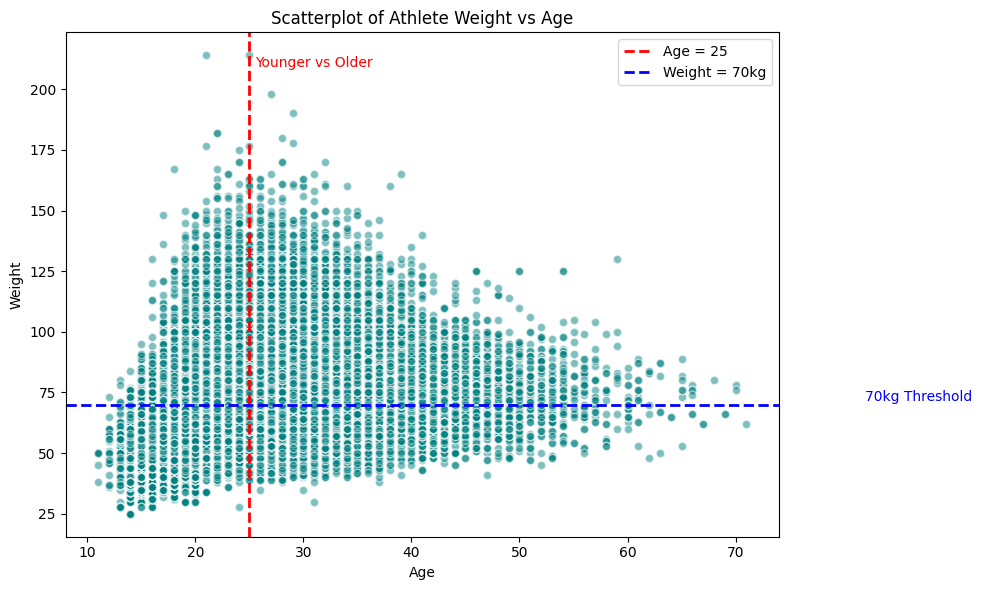

In [9]:


# Scatterplot of weight vs age
plt.figure(figsize=(10, 6))
plt.scatter(athletes['Age'], athletes['Weight'], alpha=0.5, color='teal', edgecolors='w')

#vertical line at Age 25
plt.axvline(x=25, color='red', linestyle='--', linewidth=2, label='Age = 25')
plt.text(25 + 0.5, athletes['Weight'].max() - 5, 'Younger vs Older', color='red')

#  horizontal line at Weight 70
plt.axhline(y=70, color='blue', linestyle='--', linewidth=2, label='Weight = 70kg')
plt.text(athletes['Age'].max() - 15, 71.5, '70kg Threshold', color='blue')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Scatterplot of Athlete Weight vs Age')

# Add a legend for the lines
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


5. **Generate a figure with four subplots arranged in a 2x2 grid. Each subplot should display a scatter plot of athlete height (y-axis) versus weight (x-axis), using data filtered for a specific sport. The sports to be shown in the subplots are: Athletics, Gymnastics, Swimming, Cycling.**

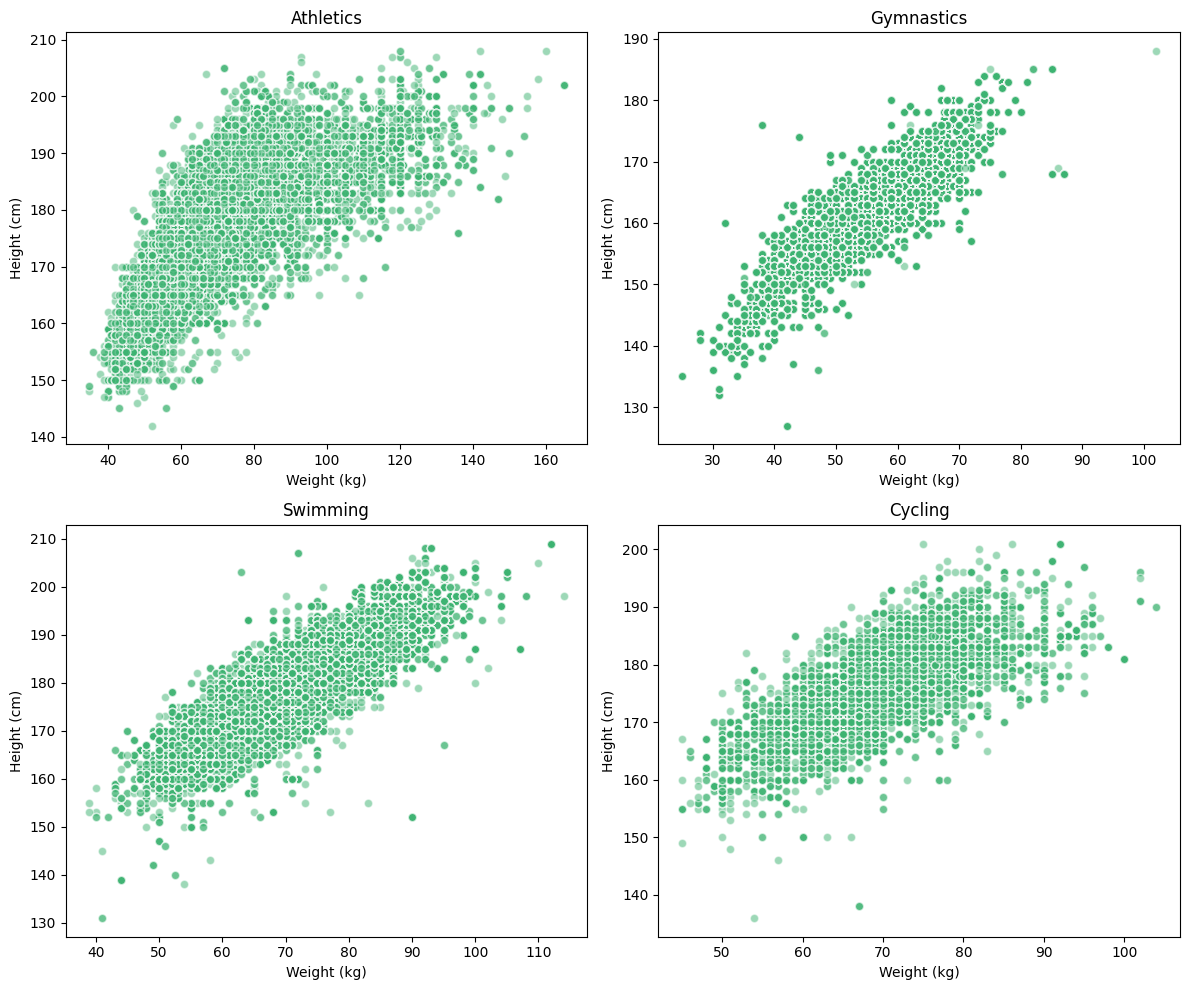

In [10]:

#sports to plot
sports = ['Athletics', 'Gymnastics', 'Swimming', 'Cycling']

#  Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # So we can loop through them easily

# Looping through each sport and creating a scatter plot
for i, sport in enumerate(sports):

    sport_data = athletes[(athletes['Sport'] == sport)].dropna(subset=['Height', 'Weight'])


    axes[i].scatter(sport_data['Weight'], sport_data['Height'], alpha=0.5, color='mediumseagreen', edgecolors='w')


    axes[i].set_title(sport)
    axes[i].set_xlabel('Weight (kg)')
    axes[i].set_ylabel('Height (cm)')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


6. **Plot two line graphs of number of athletes per year and average height per year on the same plot. Use left y-axis for count, right y-axis for average height. Label both axes clearly**

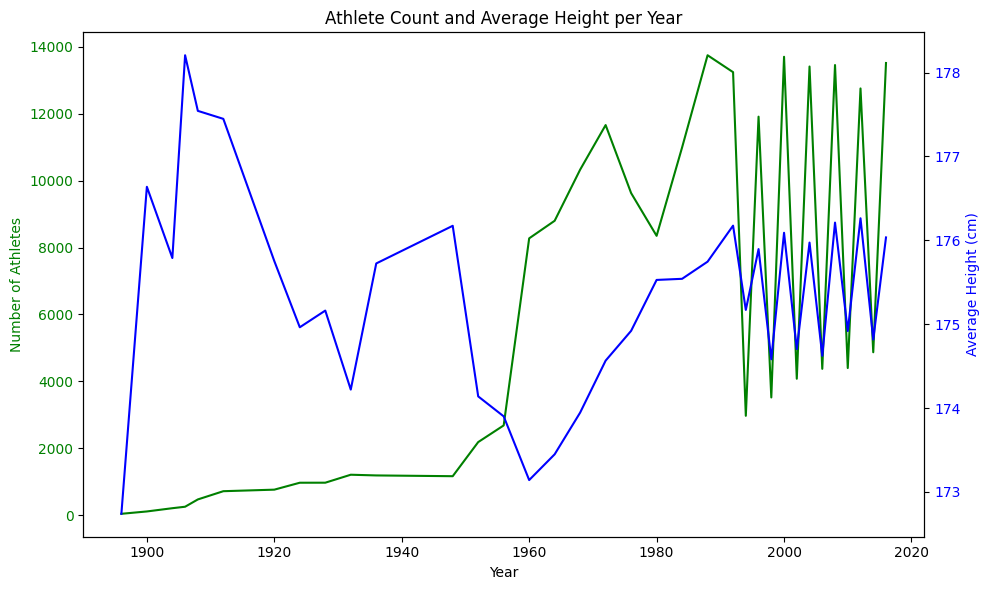

In [13]:



athletes_clean = athletes.dropna(subset=['Year', 'Height'])

#  Group by year
athletes_per_year = athletes_clean.groupby('Year').size()
avg_height_per_year = athletes_clean.groupby('Year')['Height'].mean()

#  Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line 1: Number of athletes (left y-axis)
ax1.plot(athletes_per_year.index, athletes_per_year.values, color='green', label='Athletes Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Athletes', color='green')
ax1.tick_params(axis='y', labelcolor='green')

#  second y-axis for height
ax2 = ax1.twinx()
ax2.plot(avg_height_per_year.index, avg_height_per_year.values, color='blue', label='Average Height')
ax2.set_ylabel('Average Height (cm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title('Athlete Count and Average Height per Year')
fig.tight_layout()
plt.show()


# Section 2: Seaborn

1. **Show height distribution by gender using a boxplot. Use hue to split by gender**

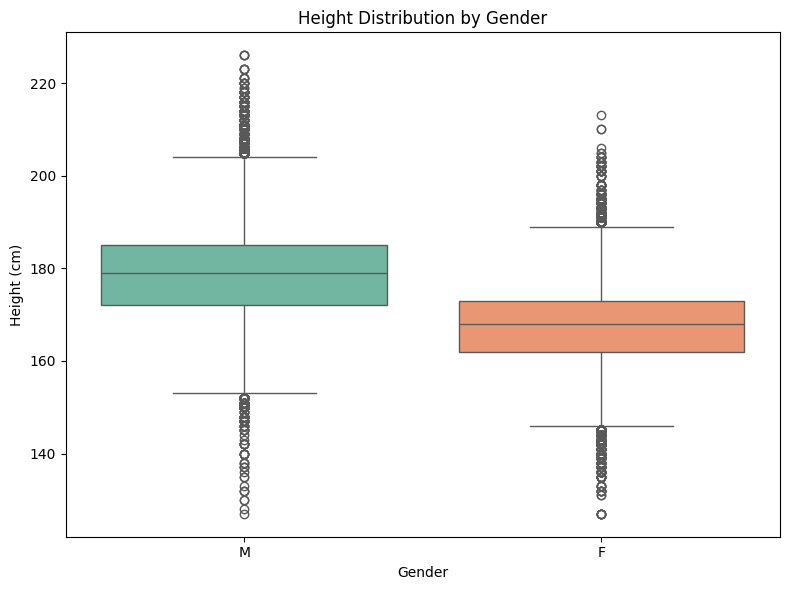

In [14]:
import seaborn as sns


#  Remove missing values in Height and Sex columns
athletes_data = athletes.dropna(subset=['Height', 'Sex'])

#  Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=athletes_data, x='Sex', y='Height', hue='Sex', palette='Set2')

#  Add labels and title
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.title('Height Distribution by Gender')

plt.tight_layout()
plt.show()


2. **Plot a histogram of athlete ages. Use bins=15.**

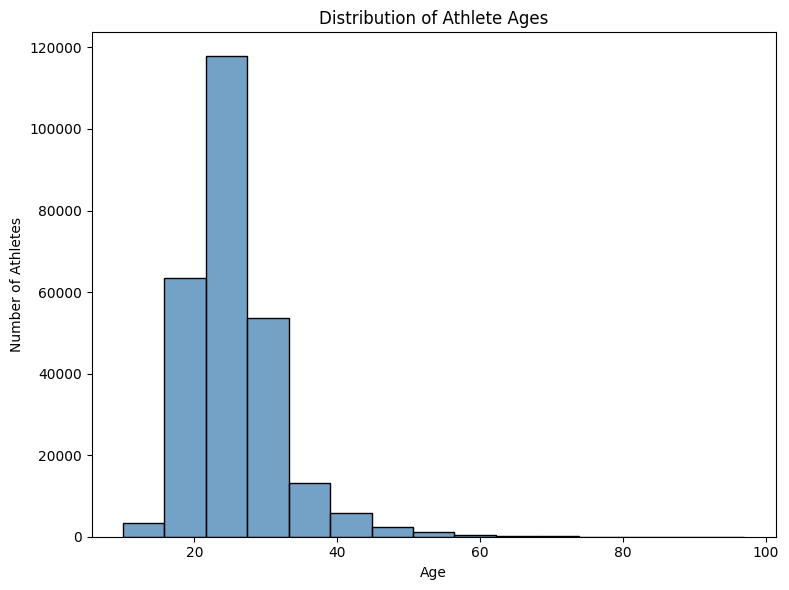

In [15]:
import seaborn as sns


# Remove missing Age values
athletes_age_data = athletes.dropna(subset=['Age'])

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=athletes_age_data, x='Age', bins=15, color='steelblue', edgecolor='black')

#  Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Athlete Ages')

plt.tight_layout()
plt.show()


# Section 3: Plotly

1. **Plot average height per year for 3 sports (e.g., Basketball, Volleyball, Athletics). Add interactive legend so user can select/deselect each sport**

In [16]:

import plotly.express as px

#  Filter data for the 3 sports and drop missing values
selected_sports = ['Basketball', 'Volleyball', 'Athletics']
filtered = athletes[athletes['Sport'].isin(selected_sports)].dropna(subset=['Year', 'Height'])

#  Group by Sport and Year to calculate average height
avg_height = (
    filtered.groupby(['Sport', 'Year'])['Height']
    .mean()
    .reset_index()
)

#  Create the interactive line plot
fig = px.line(avg_height,
              x='Year',
              y='Height',
              color='Sport',
              title='Average Height per Year for Selected Sports',
              labels={'Height': 'Average Height (cm)', 'Year': 'Year'})

#  Show the plot with interactive legend
fig.update_layout(legend_title_text='Sport')
fig.show()


# Section 4: Folium

1. **Plot the locations of Kenya, Uganda, Burundi, and Rwanda on a map. Place a red marker on Kenya's location. The other countries should have grey markers**

In [17]:
import folium

#  Define the coordinates of the countries
countries = {
    'Kenya': {'lat': -1.2921, 'lon': 36.8219, 'color': 'red'},
    'Uganda': {'lat': 1.3733, 'lon': 32.2903, 'color': 'gray'},
    'Burundi': {'lat': -3.3731, 'lon': 29.9189, 'color': 'gray'},
    'Rwanda': {'lat': -1.9403, 'lon': 29.8739, 'color': 'gray'}
}

#  Create a Folium map centered roughly around East Africa
m = folium.Map(location=[0.5, 33], zoom_start=6)

#  Add markers
for country, info in countries.items():
    folium.Marker(
        location=[info['lat'], info['lon']],
        popup=country,
        icon=folium.Icon(color=info['color'])
    ).add_to(m)

# Step 4: Display the map
m
